<a href="https://colab.research.google.com/github/raman2402/Machine-Learning/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Information about the Breast Cancer Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 

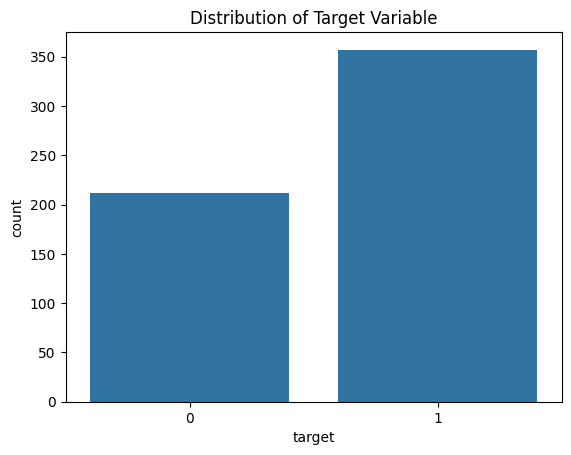

KeyboardInterrupt: 

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display basic information about the dataset
print("Basic Information about the Breast Cancer Dataset:")
print(df.info())

# Summary statistics of the features
print("\nSummary Statistics of the Features:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Pairplot for feature visualization
sns.pairplot(df, hue='target')
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_model_before_tuning = DecisionTreeClassifier(max_depth=1, min_samples_split=50, random_state=42)
dt_model_before_tuning.fit(X_train, y_train)

# Step 2: Evaluate the performance on the test set
y_pred_before_tuning = dt_model_before_tuning.predict(X_test)
accuracy_before_tuning = accuracy_score(y_test, y_pred_before_tuning)
print(f"Accuracy before hyperparameter tuning: {accuracy_before_tuning}")

# Step 3: Apply hyperparameter tuning using GridSearchCV
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(5, 55, 5)),
    'min_samples_split': list(range(2, 55, 5)),
    'min_samples_leaf': list(range(1, 55, 5))
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 4: Train a new Decision Tree model with the best hyperparameters
best_model_after_tuning = grid_search.best_estimator_

# Step 5: Evaluate the tuned model on the test set
y_pred_after_tuning = best_model_after_tuning.predict(X_test)
accuracy_after_tuning = accuracy_score(y_test, y_pred_after_tuning)
print(f"Accuracy after hyperparameter tuning: {accuracy_after_tuning}")

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)


Accuracy before hyperparameter tuning: 0.8947368421052632
Accuracy after hyperparameter tuning: 0.9649122807017544
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 22}


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report before hyperparameter tuning:")
print(classification_report(y_test, y_pred_before_tuning))

# Print Confusion Matrix before hyperparameter tuning
print("Confusion Matrix before hyperparameter tuning:")
print(confusion_matrix(y_test, y_pred_before_tuning))

# Print Classification Report after hyperparameter tuning
print("Classification Report after hyperparameter tuning:")
print(classification_report(y_test, y_pred_after_tuning))

# Print Confusion Matrix after hyperparameter tuning
print("Confusion Matrix after hyperparameter tuning:")
print(confusion_matrix(y_test, y_pred_after_tuning))

Classification Report before hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        63
           1       0.93      0.90      0.92       108

    accuracy                           0.89       171
   macro avg       0.88      0.89      0.89       171
weighted avg       0.90      0.89      0.90       171

Confusion Matrix before hyperparameter tuning:
[[56  7]
 [11 97]]
Classification Report after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix after hyperparameter tuning:
[[ 58   5]
 [  2 106]]


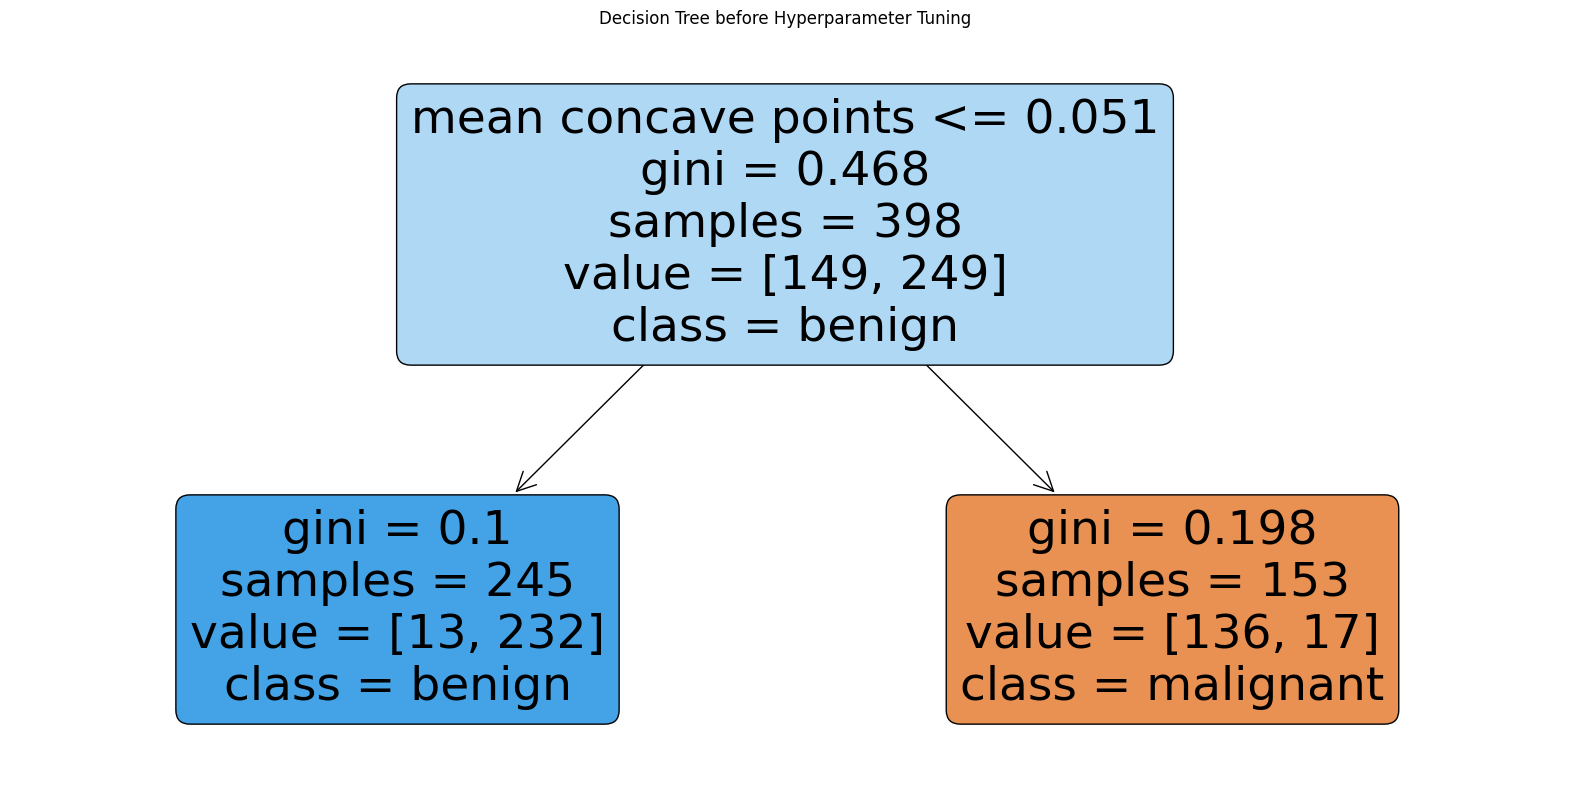

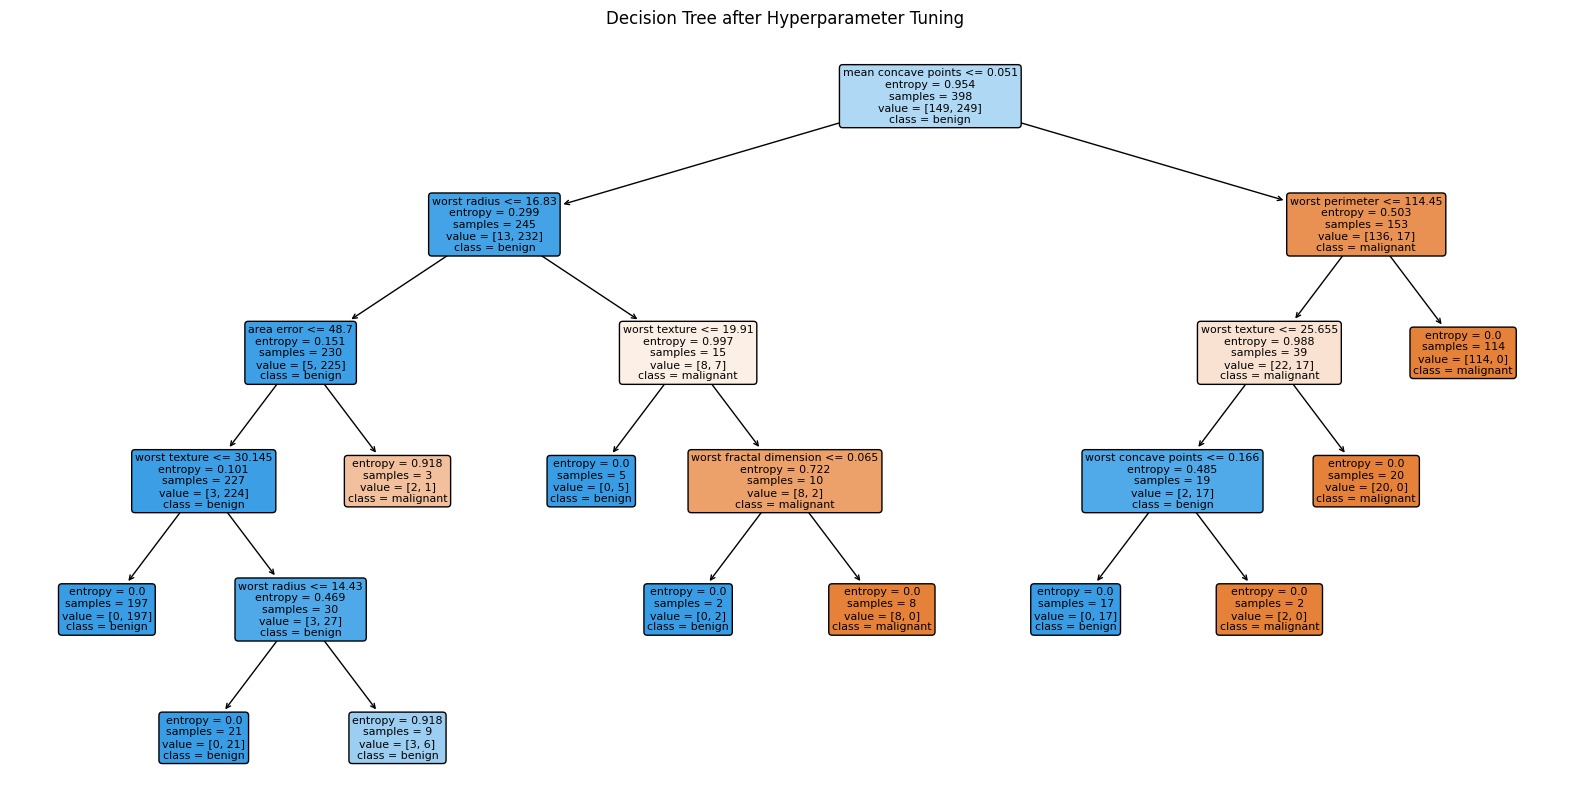

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree before hyperparameter tuning
plt.figure(figsize=(20, 10))
plot_tree(dt_model_before_tuning, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree before Hyperparameter Tuning")
plt.show()

# Visualize the decision tree after hyperparameter tuning
plt.figure(figsize=(20, 10))
plot_tree(best_model_after_tuning, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree after Hyperparameter Tuning")
plt.show()

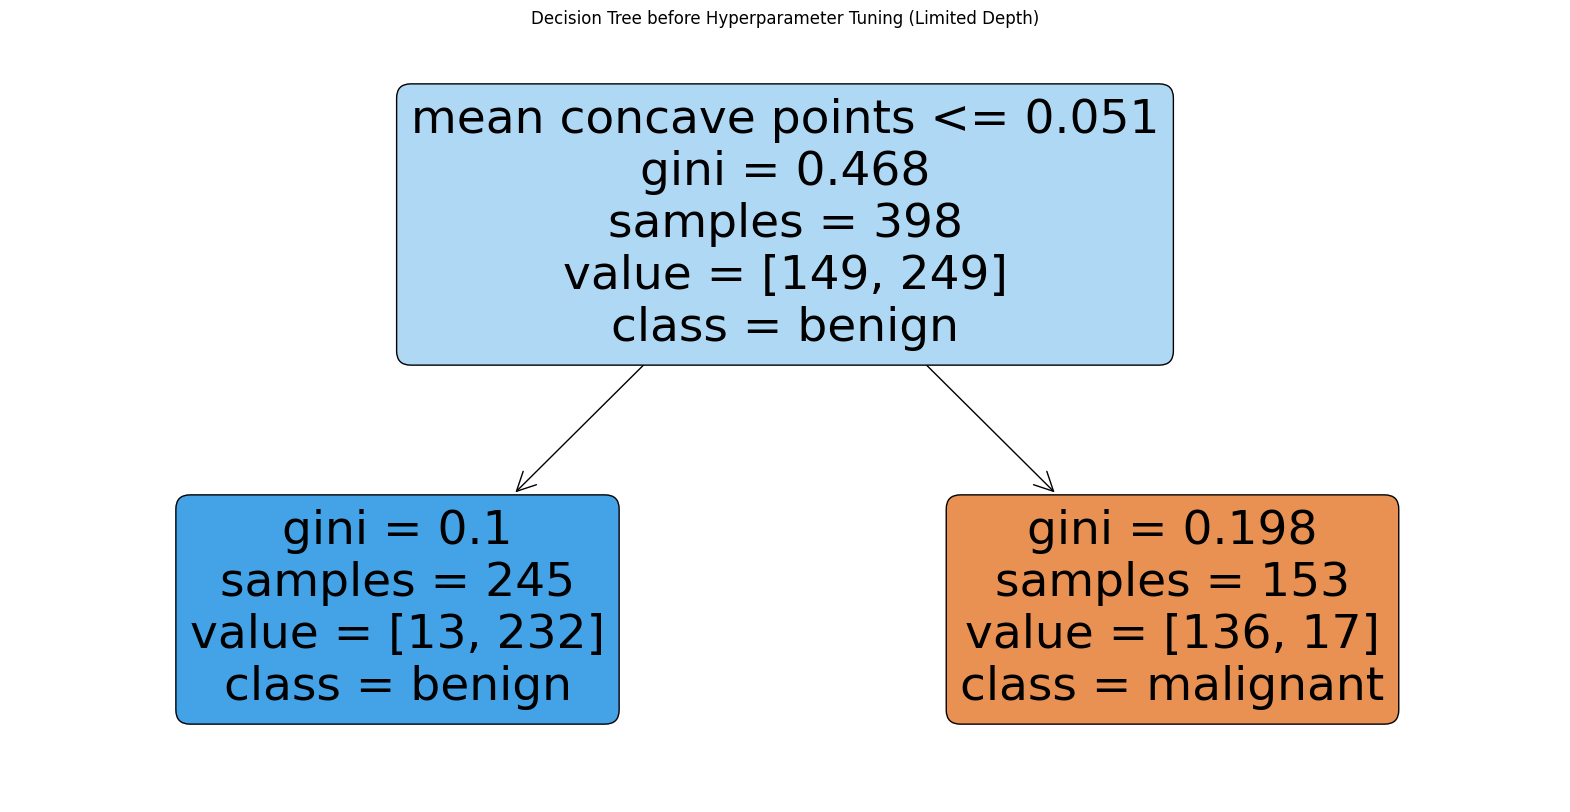

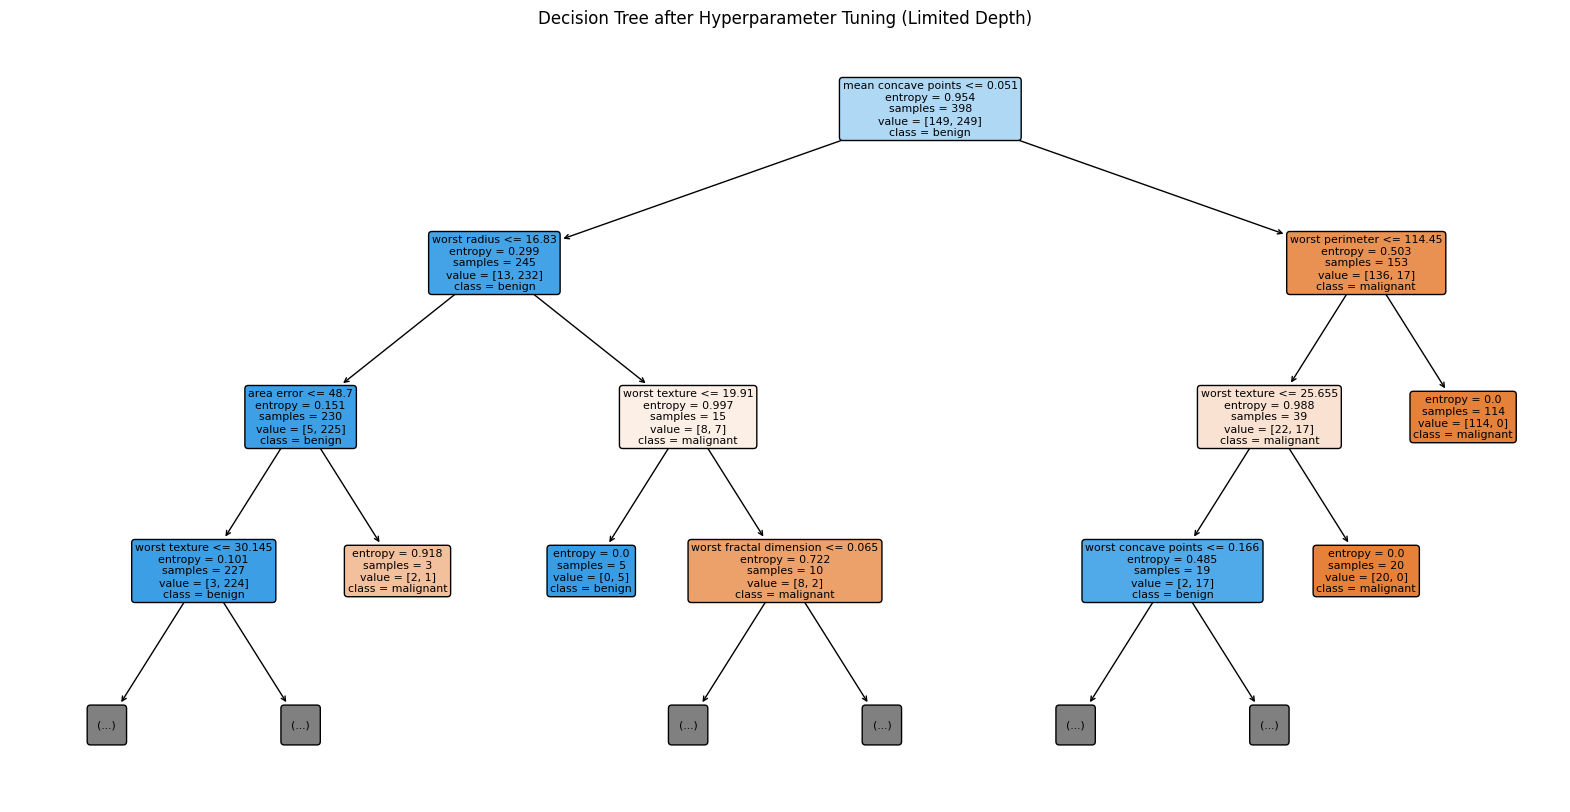

In [9]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model_before_tuning, max_depth=3, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree before Hyperparameter Tuning (Limited Depth)")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(best_model_after_tuning, max_depth=3, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree after Hyperparameter Tuning (Limited Depth)")
plt.show()
